<h2>Loading Data</h2>

The csvloader module supports loading information from the provided csv files. The script below prints basic information about the data.


In [5]:
from core.loaders.csvloader import csvloader;

path_test_data = './data/test.csv'
path_train_data = './data/train.csv'
path_ideal_data = './data/ideal.csv'

def load_data(path, label):
    data_importer = csvloader.CSVLoader(path, label)
    data_importer.read_csv()
    return data_importer

def print_csv_info(path, label):
    loader = load_data(path, label)
    loader.print_csv_info()

print_csv_info(path_test_data, 'test.csv')
print_csv_info(path_train_data, 'train.csv')
print_csv_info(path_ideal_data, 'ideal.csv')



file information for test.csv: {"size": 200, "shape": [100, 2], "dimensions": 2, "type": "float64"}
file information for train.csv: {"size": 2000, "shape": [400, 5], "dimensions": 2, "type": "float64"}
file information for ideal.csv: {"size": 20400, "shape": [400, 51], "dimensions": 2, "type": "float64"}


<h1>Cleaning Data</h1> 
The csvcleanser module cleans and prepares the data for analysis. It removes any NA entries and prepares a sorted data set by the first column.
Values that are 2* standard deviations from the mean are considered outliers.



In [6]:
from core.cleanser.csvcleanser import csvcleanser;

def print_cleansing_info(path, label):
    loader = load_data(path, label)
    data_cleanser = csvcleanser.CSVCleanser(loader.csv_data, loader.label)
    data_cleanser.print_cleansing_info()

print_cleansing_info(path_test_data, 'test.csv')
print_cleansing_info(path_train_data, 'train.csv')
print_cleansing_info(path_ideal_data, 'ideal.csv')


cleaning file information for test.csv: {"columns_with_na": [], "num_columns": 2, "sorted_by_index": 0, "removed_duplicated": 0}
cleaning file information for train.csv: {"columns_with_na": [], "num_columns": 5, "sorted_by_index": 0, "removed_duplicated": 0}
cleaning file information for ideal.csv: {"columns_with_na": [], "num_columns": 51, "sorted_by_index": 0, "removed_duplicated": 0}


<h1>Training Data</h1>

We need to find the best fit for the 4 y columns in the training data against the 50 ideal functions provided.
We use the least squared error method defined in out core.stats module to find the 4 best fit ideal functions out of the 50.


In [7]:
from core.stats import stats
import matplotlib.pyplot as plt
import json

stat = stats.Stat()

train_data_importer = load_data(path_train_data, 'train.csv')
train_data_cleanser = csvcleanser.CSVCleanser(train_data_importer.csv_data, train_data_importer.label)
#remove outliers
train_data_cleanser.removeOutliers(1)    
trainData = train_data_cleanser.df

ideal_data_importer = load_data(path_ideal_data, 'ideal.csv')
ideal_data_cleanser = csvcleanser.CSVCleanser(ideal_data_importer.csv_data, ideal_data_importer.label)
idealData = ideal_data_cleanser.df

best_fit = stat.leastSquare(trainData[0].to_numpy(), trainData, idealData)
print(best_fit)



{"1": 10, "2": 26, "3": 8, "4": 25}


<h1>Plot of train functions against the selected ideal functions<h1>

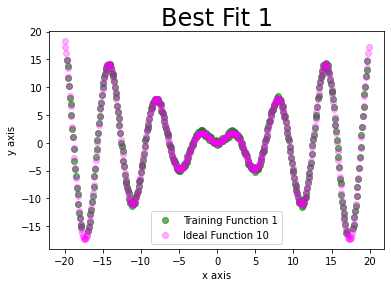

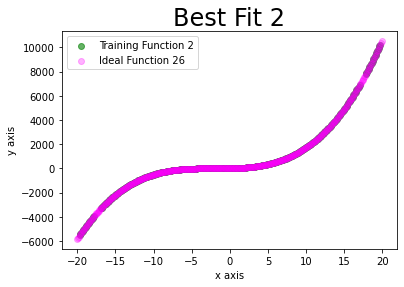

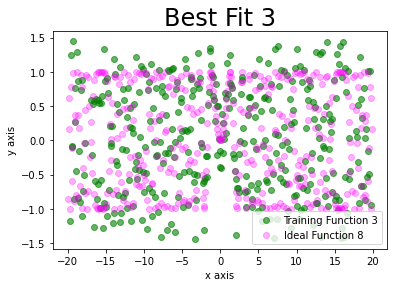

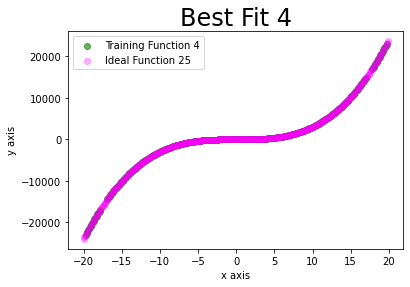

In [8]:
fit = json.loads(best_fit)
for key in fit:
    yTrain = trainData[int(key)]
    yIdeal = idealData[fit[key]]
    plt.scatter(y = yTrain, x = trainData[0], alpha = 0.6, color='green')
    plt.scatter(y = yIdeal, x = idealData[0], color = 'magenta', alpha = 0.3)

    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.legend(labels=['Training Function {}'.format(key), 'Ideal Function {}'.format(fit[key])])
    plt.title('Best Fit {}'.format(key), size=24)
    plt.show()


<h1>Results</h1>
As per the analysis of test data, several points map to another point in ideal function. Some points map to multiple ideal functions following the criterion of deviation specified in the assignemnt.

The tables and accompanying code are available at this repository:

```
https://github.com/ivegotwings/IUBH_PYTHON_ASSIGNMENT/tree/develop
```

The read me instructions provide information for set up and running the code.
The output analysis is in output.csv file inside data/csv/output directory.

Kindly clone the repo and follow the instructions.
